# <CENTER>HAPPINESS DATASET <CENTER>

Este año se cumple el 10º aniversario del Informe Mundial de la Felicidad, que utiliza datos de encuestas globales para informar cómo las personas evalúan sus propias vidas.

El calculo de la felicidad se realiza mediante encuenstas realizadas a los ciudadanos donde se les pide que piensen en una escala, con la mejor vida posible para ellos siendo un 10, y la peor vida posible siendo un 0. Luego se les pide que califiquen sus propias vidas actuales en esa escala de 0 a 10.
Las columnas que siguen a la puntuación de felicidad (producción económica, apoyo social, esperanza de vida, libertad, ausencia de corrupción y generosidad) no tienen ningún impacto en el puntaje total reportado para cada país, pero sí explican por qué algunos países tienen un rango más alto que otros.

"*Mientras luchamos contra los males de la enfermedad y la guerra, es esencial recordar el deseo universal de felicidad y la capacidad de los individuos para unirse al apoyo mutuo en tiempos de gran necesidad*".

Objetivo: Analizaremos los datos de 148 paises entre los años 2015 a 2019 para obtener respuestas a:
Qué países o regiones ocupan el lugar más alto en felicidad general y cada uno de los seis factores que contribuyen a la felicidad? ¿Cómo cambiaron los rangos o puntajes de los países entre los informes de 2015 y 2019? ¿Algún país experimentó un aumento o disminución significativa de la felicidad?

Para ampliar información: 

https://worldhappiness.report/

https://www.kaggle.com/datasets/mathurinache/world-happiness-report

https://www.gallup.com/home.aspx

## 1. Carga y Preprocesamiento

Librerias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import bar_chart_race as bcr
import warnings
# mapas interactivos.
import geopandas as gpd
from branca.colormap import LinearColormap
import streamlit.components.v1 as components
import plotly.graph_objs as go
import matplotlib.gridspec as gs
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import json
from PIL import Image


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

Lectura de los dataset

In [3]:
d15 = pd.read_csv("dataset/2015.csv",sep="[;]",engine="python")
d16 = pd.read_csv("dataset/2016.csv",sep="[;]", engine="python")
d17 = pd.read_csv("dataset/2017.csv",sep="[;]", engine="python")
d18 = pd.read_csv("dataset/2018.csv",sep="[;]", engine="python")
d19 = pd.read_csv("dataset/2019.csv",sep="[;]", engine="python")


In [4]:
d15.shape

(148, 12)

In [5]:
d15.dtypes

Country                          object
Region                           object
Happiness Rank                    int64
Happiness Score                  object
Standard Error                   object
Economy (GDP per Capita)         object
Family                           object
Health (Life Expectancy)         object
Freedom                          object
Trust (Government Corruption)    object
Generosity                       object
Dystopia Residual                object
dtype: object

In [6]:
d15['Happiness Score'] = d15['Happiness Score'].apply(lambda x: x.replace(',','.'))
d15['Economy (GDP per Capita)'] = d15['Economy (GDP per Capita)'].apply(lambda x: x.replace(',','.'))
d15['Family'] = d15['Family'].apply(lambda x: x.replace(',','.'))
d15['Health (Life Expectancy)'] = d15['Health (Life Expectancy)'].apply(lambda x: x.replace(',','.'))
d15['Freedom'] = d15['Freedom'].apply(lambda x: x.replace(',','.'))
d15['Trust (Government Corruption)'] = d15['Trust (Government Corruption)'].apply(lambda x: x.replace(',','.'))
d15['Generosity'] = d15['Generosity'].apply(lambda x: x.replace(',','.'))

In [7]:
d15['Happiness Score'] = d15['Happiness Score'].astype(float)
d15['Economy (GDP per Capita)'] = d15['Economy (GDP per Capita)'].astype(float)
d15['Family'] = d15['Family'].astype(float)
d15['Health (Life Expectancy)'] = d15['Health (Life Expectancy)'].astype(float)
d15['Freedom'] = d15['Freedom'].astype(float)
d15['Trust (Government Corruption)'] = d15['Trust (Government Corruption)'].astype(float)
d15['Generosity'] = d15['Generosity'].astype(float)

In [8]:
d15.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [9]:
d15.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.59,"0,03",1.4,1.35,0.94,0.67,0.42,0.30,"2,52"
1,Iceland,Western Europe,2,7.56,"0,05",1.3,1.40,0.95,0.63,0.14,0.44,"2,7"


In [10]:
d15.tail(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
146,Burundi,Sub-Saharan Africa,157,2.91,"0,09",0.02,0.42,0.22,0.12,0.10,0.20,"1,83"
147,Togo,Sub-Saharan Africa,158,2.84,"0,07",0.21,0.14,0.28,0.36,0.11,0.17,"1,57"


In [11]:
d15.drop(["Happiness Rank", "Standard Error", "Dystopia Residual"] , axis=1, inplace=True)

In [12]:
d15["Year"]=2015

In [13]:
d16.shape

(148, 13)

In [14]:
d16.dtypes

Country                          object
Region                           object
Happiness Rank                    int64
Happiness Score                  object
Lower Confidence Interval        object
Upper Confidence Interval        object
Economy (GDP per Capita)         object
Family                           object
Health (Life Expectancy)         object
Freedom                          object
Trust (Government Corruption)    object
Generosity                       object
Dystopia Residual                object
dtype: object

In [15]:
d16['Happiness Score'] = d16['Happiness Score'].apply(lambda x: x.replace(',','.'))
d16['Economy (GDP per Capita)'] = d16['Economy (GDP per Capita)'].apply(lambda x: x.replace(',','.'))
d16['Family'] = d16['Family'].apply(lambda x: x.replace(',','.'))
d16['Health (Life Expectancy)'] = d16['Health (Life Expectancy)'].apply(lambda x: x.replace(',','.'))
d16['Freedom'] = d16['Freedom'].apply(lambda x: x.replace(',','.'))
d16['Trust (Government Corruption)'] = d16['Trust (Government Corruption)'].apply(lambda x: x.replace(',','.'))
d16['Generosity'] = d16['Generosity'].apply(lambda x: x.replace(',','.'))

In [16]:
d16['Happiness Score'] = d16['Happiness Score'].astype(float)
d16['Economy (GDP per Capita)'] = d16['Economy (GDP per Capita)'].astype(float)
d16['Family'] = d16['Family'].astype(float)
d16['Health (Life Expectancy)'] = d16['Health (Life Expectancy)'].astype(float)
d16['Freedom'] = d16['Freedom'].astype(float)
d16['Trust (Government Corruption)'] = d16['Trust (Government Corruption)'].astype(float)
d16['Generosity'] = d16['Generosity'].astype(float)

In [17]:
d16.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [18]:
d16.head(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.53,"7,46","7,59",1.44,1.16,0.80,0.58,0.44,0.36,"2,74"
1,Switzerland,Western Europe,2,7.51,"7,43","7,59",1.53,1.15,0.86,0.59,0.41,0.28,"2,69"


In [19]:
d16.tail(2)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
146,Syria,Middle East and Northern Africa,156,3.07,"2,94","3,2",0.75,0.15,0.63,0.07,0.17,0.48,"0,82"
147,Burundi,Sub-Saharan Africa,157,2.91,"2,73","3,08",0.07,0.23,0.16,0.04,0.09,0.20,"2,1"


In [20]:
d16.drop(["Happiness Rank", "Lower Confidence Interval", "Upper Confidence Interval", "Dystopia Residual"], axis=1, inplace=True)

In [21]:
d16["Year"]=2016

In [22]:
d17.columns

Index(['Country', 'Region', 'Happiness.Rank', 'Happiness.Score',
       'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [23]:
d17.shape

(148, 13)

In [24]:
d17.dtypes

Country                          object
Region                           object
Happiness.Rank                    int64
Happiness.Score                  object
Whisker.high                     object
Whisker.low                      object
Economy..GDP.per.Capita.         object
Family                           object
Health..Life.Expectancy.         object
Freedom                          object
Generosity                       object
Trust..Government.Corruption.    object
Dystopia.Residual                object
dtype: object

In [25]:
##df17["Happiness Score"]= df17["Happiness Score"].astype(float)

In [26]:
d17.head(2)

,Country,Region,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,Western Europe,1,"7,54","7,59","7,48","1,62","1,53","0,8","0,64","0,36","0,32","2,28"
1,Denmark,Western Europe,2,"7,52","7,58","7,46","1,48","1,55","0,79","0,63","0,36","0,4","2,31"


In [27]:
d17.tail(2)

,Country,Region,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
146,Tanzania,Sub-Saharan Africa,153,"3,35","3,46","3,24","0,51","1,04","0,36","0,39","0,35","0,07","0,62"
147,Burundi,Sub-Saharan Africa,154,"2,9","3,07","2,74","0,09","0,63","0,15","0,06","0,2","0,08","1,68"


In [28]:
d17.drop(["Happiness.Rank", "Whisker.high","Whisker.low", "Dystopia.Residual"], axis=1, inplace=True)

In [29]:
d17.rename(columns = {"Happiness.Score":"Happiness Score","Economy..GDP.per.Capita.":"Economy (GDP per Capita)","Health..Life.Expectancy.":"Health (Life Expectancy)", 
"Trust..Government.Corruption.":"Trust (Government Corruption)", "Dystopia.Residual": "Dystopia Residual"} , inplace=True)

In [30]:
d17['Happiness Score'] = d17['Happiness Score'].apply(lambda x: x.replace(',','.'))
d17['Economy (GDP per Capita)'] = d17['Economy (GDP per Capita)'].apply(lambda x: x.replace(',','.'))
d17['Family'] = d17['Family'].apply(lambda x: x.replace(',','.'))
d17['Health (Life Expectancy)'] = d17['Health (Life Expectancy)'].apply(lambda x: x.replace(',','.'))
d17['Freedom'] = d17['Freedom'].apply(lambda x: x.replace(',','.'))
d17['Trust (Government Corruption)'] = d17['Trust (Government Corruption)'].apply(lambda x: x.replace(',','.'))
d17['Generosity'] = d17['Generosity'].apply(lambda x: x.replace(',','.'))

In [31]:
d17['Happiness Score'] = d17['Happiness Score'].astype(float)
d17['Economy (GDP per Capita)'] = d17['Economy (GDP per Capita)'].astype(float)
d17['Family'] = d17['Family'].astype(float)
d17['Health (Life Expectancy)'] = d17['Health (Life Expectancy)'].astype(float)
d17['Freedom'] = d17['Freedom'].astype(float)
d17['Trust (Government Corruption)'] = d17['Trust (Government Corruption)'].astype(float)
d17['Generosity'] = d17['Generosity'].astype(float)

In [32]:
d17["Year"]=2017

In [33]:
d18.shape

(148, 10)

In [34]:
d18.columns

Index(['Overall rank', 'Country or region', 'Region', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [35]:
d18.dtypes

Overall rank                      int64
Country or region                object
Region                           object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [36]:
d18.head(2)

,Overall rank,Country or region,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,Western Europe,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,Western Europe,7.594,1.456,1.582,0.861,0.686,0.286,0.340


In [37]:
d18.tail(2)

,Overall rank,Country or region,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
146,154,Sudan,Sub-Saharan Africa,3.254,0.337,0.608,0.177,0.112,0.224,0.106
147,156,Burundi,Sub-Saharan Africa,2.905,0.091,0.627,0.145,0.065,0.149,0.076


In [38]:
d18['Overall rank']

0        1
1        2
2        3
3        4
4        5
      ... 
143    151
144    152
145    153
146    154
147    156
Name: Overall rank, Length: 148, dtype: int64

In [39]:
d18.drop(['Overall rank'], axis=1, inplace=True)

In [40]:
d18.rename(columns = {"Score":"Happiness Score", "Country or region":"Country","GDP per capita":"Economy (GDP per Capita)","Healthy life expectancy":"Health (Life Expectancy)", 
"Perceptions of corruption":"Trust (Government Corruption)", "Freedom to make life choices": "Freedom", "Social support": "Family"} , inplace=True)

In [41]:
d18["Year"]=2018

In [42]:
d19.shape

(148, 10)

In [43]:
d19.columns

Index(['Overall rank', 'Country or region', 'Region', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [44]:
d19.head(2)

,Overall rank,Country or region,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [45]:
d19.tail(2)

,Overall rank,Country or region,Region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
146,154,Afghanistan,Southern Asia,3.203,0.350,0.517,0.361,0.00,0.158,0.025
147,156,Sudan,Sub-Saharan Africa,2.853,0.306,0.575,0.295,0.01,0.202,0.091


In [46]:
d19.drop(['Overall rank'], axis=1, inplace=True)

In [47]:
d19.rename(columns = {"Score":"Happiness Score", "Country or region":"Country", "Freedom to make life choices": "Freedom", "GDP per capita":"Economy (GDP per Capita)",
"Healthy life expectancy":"Health (Life Expectancy)", "Perceptions of corruption":"Trust (Government Corruption)", "Social support": "Family"} , inplace=True)

In [48]:
d19["Year"]=2019

In [49]:
#Happiness score:
#hapscore = df.iloc[:, [3]].values

# 2. Limpieza dataset

In [50]:
d15.isnull().sum().sum()

0

In [51]:
d16.isnull().sum().sum()

0

In [52]:
d17.isnull().sum().sum()

0

In [53]:
d18.isnull().sum()


Country                          0
Region                           0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    1
Year                             0
dtype: int64

In [54]:
d18["Trust (Government Corruption)"]=d18["Trust (Government Corruption)"].fillna(d18["Trust (Government Corruption)"].mean())

In [55]:
d19.isnull().sum().sum()

0

Pasar dataset limpio a csv

In [56]:
d15.to_csv("2015.csv")
d16.to_csv("2016.csv")
d17.to_csv("2017.csv")
d18.to_csv("2018.csv")
d19.to_csv("2019.csv")

In [57]:
df155 = pd.read_csv("2015.csv",sep="[,]",engine="python")
df165 = pd.read_csv("2016.csv",sep="[,]",engine="python")
df175 = pd.read_csv("2017.csv",sep="[,]",engine="python")
df185 = pd.read_csv("2018.csv",sep="[,]",engine="python")
df195 = pd.read_csv("2019.csv",sep="[,]",engine="python")

In [58]:
df15=df155.drop(["Unnamed: 0"], axis=1, inplace=True)
df16=df165.drop(["Unnamed: 0"], axis=1, inplace=True)
df17=df175.drop(["Unnamed: 0"], axis=1, inplace=True)
df18=df185.drop(["Unnamed: 0"], axis=1, inplace=True)
df19=df195.drop(["Unnamed: 0"], axis=1, inplace=True)

In [59]:
df15=df155
df16=df165
df17=df175
df18=df185
df19=df195

In [60]:
df15.dtypes

Country                           object
Region                            object
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Year                               int64
dtype: object

# Año 2015

## 1. Análisis normalidad y correlación

In [61]:
from scipy.stats import shapiro

In [62]:
test_norm = shapiro(df15["Happiness Score"])
print(f"El p-valor obtenido en el test de Shapiro es de {test_norm.pvalue}")

El p-valor obtenido en el test de Shapiro es de 0.03414018079638481


C:\Users\fara1\AppData\Local\Temp\ipykernel_12312\134001680.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='Happiness Score', ylabel='Density'>

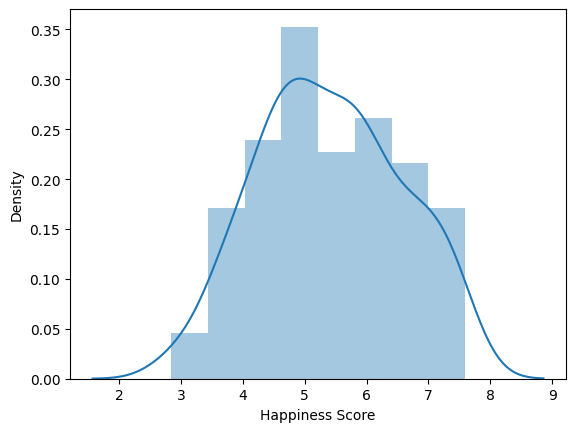

In [63]:
sns.distplot(df15["Happiness Score"])

C:\Users\fara1\AppData\Local\Temp\ipykernel_12312\3828399038.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot: >

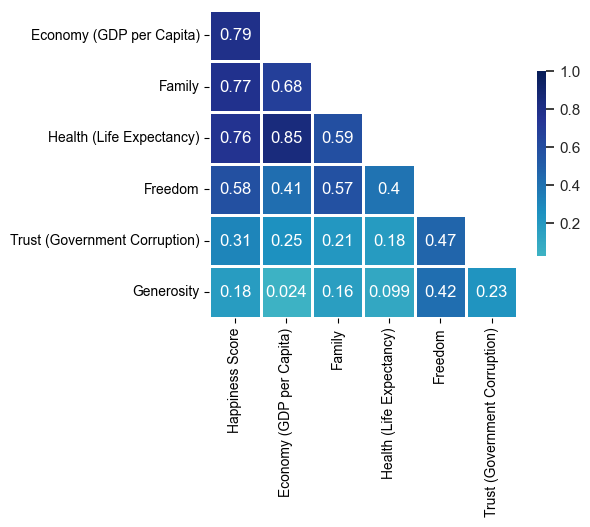

In [64]:

corr = df15.corr(method = 'spearman').sort_values(by = 'Happiness Score', axis = 0, ascending = False).sort_values(by = 'Happiness Score', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool)) # tri u o tri l para cambiar la forma
 # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5,4))
 # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 # Draw the heatmap with the mask and correct aspect ratio
sns.set()
sns.heatmap(corr.iloc[1:7,0:6], mask=mask[1:7,0:6], cmap="YlGnBu", vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .6}, annot = True)


## 2.0 Análisis Happiness

Top 5 paises más felices

In [65]:
topfelices =px.histogram(df15.head().sort_values(by="Happiness Score"),x="Happiness Score", y="Country", color= "Happiness Score", width=800, title="Top 5 países más felices")
topfelices.show()


In [66]:
df15.columns

Index(['Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Year'],
      dtype='object')

In [67]:
topnofelices =px.histogram(df15.tail(),x="Happiness Score", y="Country", color= "Happiness Score", width=800, title="Top 5 países menos felices")
topnofelices.show()

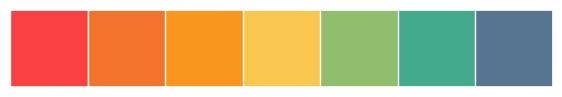

In [68]:
#Colors to be used in the plots
color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
sns.palplot(color)

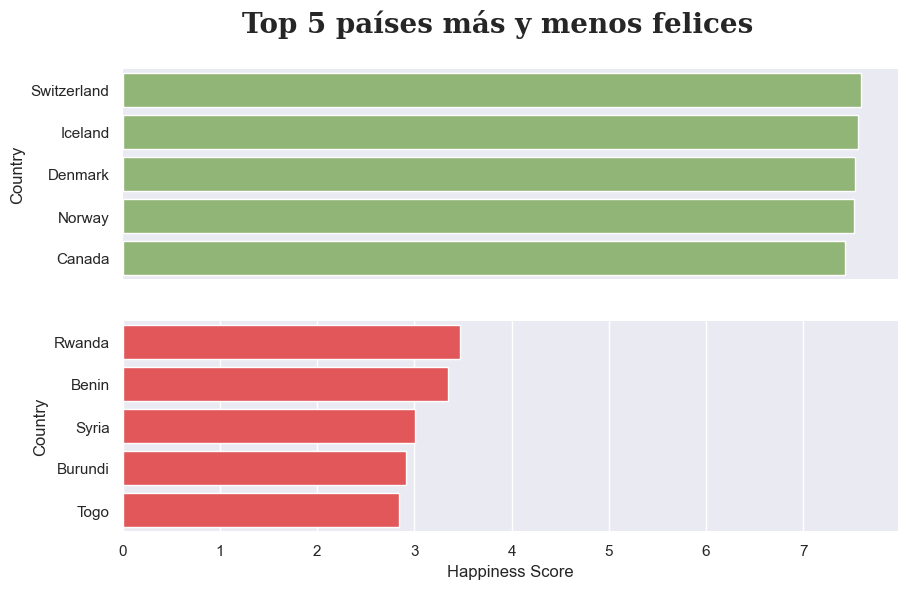

In [69]:
#top 5 and bottom 5 countries in 2021 report
fig= plt.figure(figsize=(10,6))
g=gs.GridSpec(ncols=1, nrows=2, figure=fig)
plt.suptitle("Top 5 países más y menos felices", family='Serif', weight='bold', size=20)
ax1=plt.subplot(g[0,0])

top_5=df15.head(5)
bot_5= df15.tail(5)
ax1=sns.barplot(data=top_5, x=top_5['Happiness Score'],y=top_5['Country'], color=color[4])
#ax1.set_xlabel('')
ax1.xaxis.set_visible(False)
ax1.annotate("Top 5 countries in Happiness index",xy=(8,2), family='Serif', weight='bold', size=12)
ax2=plt.subplot(g[1,0], sharex=ax1)
ax2=sns.barplot(data=bot_5, x=bot_5['Happiness Score'],y=bot_5['Country'], color=color[0])
ax2.annotate("Bottom 5 countries in Happiness index",xy=(8,2), family='Serif', weight='bold', size=12)
for s in ['left','right','top','bottom']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)


In [70]:
#MADHAN CHANDRASEKHARAN Kaggle World Happiness Report 2021

Características

Regiones felicidad

<AxesSubplot: ylabel='Region'>

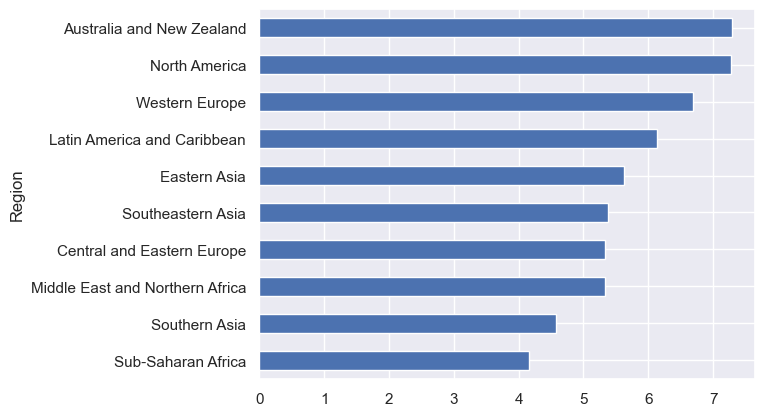

In [71]:
df15.groupby(by='Region').mean()['Happiness Score'].sort_values().plot(kind='barh')

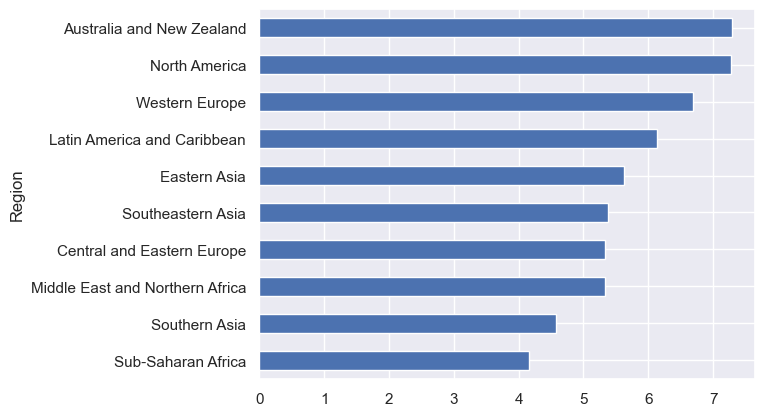

In [72]:
data = df15.groupby(by='Region').mean()['Happiness Score'].sort_values()
ax = data.plot.barh(rot=0)

Top 5 paises menos felices

Características

Mapa

In [73]:
fig = px.choropleth(data_frame=df15,
                    locations="Country",
                    locationmode="country names",
                    color="Happiness Score",
                    range_color=(0,9),
                    color_continuous_scale='magma',
                    title="Happiness Score Map 2015")
fig.show()

In [74]:
def world_map_plot(year):
    d = dict(
        type = 'choropleth',
        colorscale = 'rdylgn',
        marker_line_width = 1,
        locations = df15['Country'],
        locationmode = 'country names',
        z = df15["Happiness Score"],
        text = df15["Country"],
        colorbar = {'title' : "Happiness Score"}
    )
    layout = dict(title = f'Happiness Map {year}',
                geo = dict(projection = {'type' : 'mercator'}, showocean = True, showlakes=True, showrivers=True))

    choromap = go.Figure(data=[d], layout=layout)

    choromap.update_layout(autosize=False, width=800, height=800)

    iplot(choromap, validate=False)

In [75]:
world_map_plot('2015')

In [76]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        marker_line_width=1,
        locations = df15['Country'],
        locationmode = "country names",
        z = df15['Happiness Score'],
        text = df15['Country'],
        colorbar = {'title' : 'Happiness Score'},
        
      )
layout = dict(title = 'Happiness Score Map 2015',
              geo = dict(projection = {'type':'mercator'}, showocean = False, showlakes = True, showrivers = True, )
             )
choromap = go.Figure(data = [data],layout = layout)

choromap.update_layout(autosize = False, 
                       width = 600,
                       height = 600)

iplot(choromap, validate=False)

In [77]:
data = dict(
        type = 'choropleth',
        colorscale = 'rdylgn',
        marker_line_width=1,
        locations = df15['Country'],
        locationmode = "country names",
        z = df15['Happiness Score'],
        text = df15['Country'],
        colorbar = {'title' : 'Happiness Score'},
        
      )
layout = dict(title = 'Happiness Score Map 2015',
              geo = dict(projection = {'type':'mercator'}, showocean = False, showlakes = True, showrivers = True, )
             )
choromap = go.Figure(data = [data],layout = layout)

choromap.update_layout(autosize = False, 
                       width = 600,
                       height = 600)

iplot(choromap, validate=False)

In [78]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter_geo(df15, locations="Country",locationmode="country names", color="Happiness Score", hover_name="Country", size="Happiness Score")
fig.show()

In [79]:
df1 = px.data.gapminder()
fig23 = px.choropleth(df15, locations="Country",locationmode="country names", color="Happiness Score", hover_name="Country")
fig23.show()

In [80]:
# # create a map using choropleth
# fig24 = px.choropleth(df15, locations='Country', locationmode="country names",color='Happiness Score', hover_name='Region', 
#                     animation_frame='Year', color_continuous_scale=px.colors.sequential.Plasma, projection='natural earth')
# fig.show() 

In [81]:
# df2=df15[['Country','Region','Happiness Score','Economy (GDP per Capita)','Family', 'Health (Life Expectancy)', 'Freedom','Trust (Government Corruption)','Generosity']]

In [82]:
# cols=df2.corr()['Happiness Score'].sort_values(ascending=False)

In [83]:
# fig=plt.figure(figsize=(15,10))
# plt.suptitle("Comparing the Features that contribute for Ladder score",family='Serif', weight='bold', size=20)
# j=0
# for i in cols.index[1:]:
    
#     ax=plt.subplot(421+j)
#     ax=sns.regplot(data=df2, x='Happiness Score',y=i, color=color[-j])
#     ax.legend('')
#     j=j+1
    
# plt.legend('')

In [84]:
#SEA = data_2021[data_2021['Regional indicator'] == "Southeast Asia"]['Country name'].to_list()

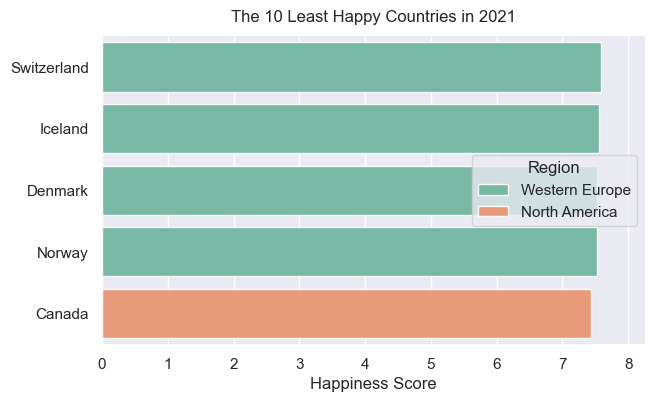

In [85]:
top_5 = df15.head()

plt.figure(figsize=(7,4))
g = sns.barplot(data=top_5, x='Happiness Score', y='Country', alpha=0.95, 
                hue='Region', dodge=False,
                palette='Set2')
g.set_title('The 10 Least Happy Countries in 2021', y=1.02)
g.set(xlabel='Happiness Score',
      ylabel=None)
g.set_xlim(0, 8.25)
sns.despine(left=True, bottom=True, top=True)

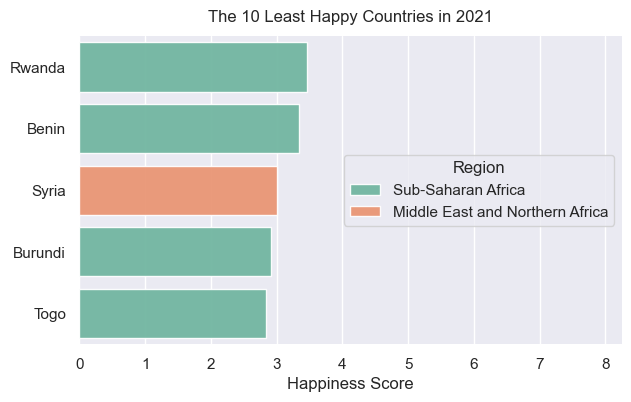

In [86]:
bottom_5 = df15.tail()

plt.figure(figsize=(7,4))
g = sns.barplot(data=bottom_5, x='Happiness Score', y='Country', alpha=0.95, 
                hue='Region', dodge=False,
                palette='Set2')
g.set_title('The 10 Least Happy Countries in 2021', y=1.02)
g.set(xlabel='Happiness Score',
      ylabel=None)
g.set_xlim(0, 8.25)
sns.despine(left=True, bottom=True, top=True)

In [87]:
factorstop = df15.iloc[:,:]

# Creating trace1
trace1 = go.Scatter(x = df15['Country'],
                    y = df15['Economy (GDP per Capita)'],
                    mode = "lines+markers",
                    name = "Economy",
                    marker = dict(color = 'red'),
                    text= df15.Country)

# Creating trace2
trace2 = go.Scatter(x = df15['Country'],
                    y = df15['Freedom'],
                    mode = "lines+markers",
                    name = "Freedom",
                    marker = dict(color = 'blue'),
                    text= df15.Country)

# Creating trace3
trace3 = go.Scatter(x = df15['Country'],
                    y = df15['Trust (Government Corruption)'],
                    mode = "lines+markers",
                    name = "Trust",
                    marker = dict(color = 'green'),
                    text= df15.Country)

# Creating trace4
trace4 = go.Scatter(x = df15['Country'],
                    y = df15["Health (Life Expectancy)"],
                    mode = "lines+markers",
                    name = "Health (Life Expectancy)",
                    marker = dict(color = 'black'),
                    text= df15.Country)

# Creating trace4
trace5 = go.Scatter(x = df15["Country"],
                    y = df15["Generosity"],
                    mode = "lines+markers",
                    name = "Generosity",
                    marker = dict(color = 'black'),
                    text= df15.Country)

data = [trace1, trace2, trace3, trace4, trace5]
layout = dict(title = 'Comparación factores 2015',
              xaxis= dict(title= 'Countries',ticklen= 5,zeroline= False),
              hovermode="x unified")
fig = dict(data = data, layout = layout)
iplot(fig)

In [88]:
# Group data by year and compute mean of factors
grouped = df15.groupby(by='Region')[['Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity']].mean().reset_index()

In [89]:
# Reconstruct DataFrame
grouped = pd.melt(frame = grouped, id_vars='Region', 
                  value_vars=['Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity'],
                  var_name='Factor', value_name='Avg_value')

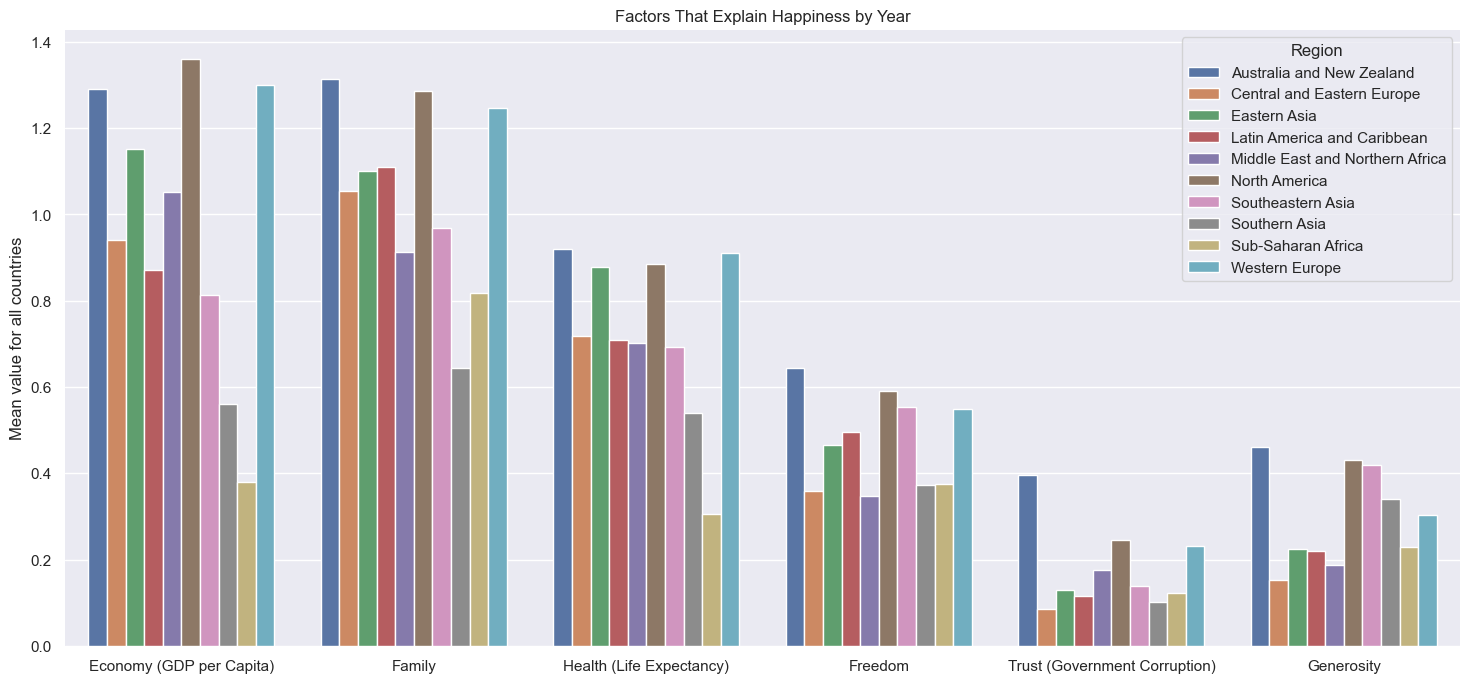

In [90]:
plt.figure(figsize=(18,8))
g = sns.barplot(x=grouped[grouped['Factor'] != 'Happiness Score']['Factor'],
                y=grouped['Avg_value'], hue=grouped['Region'])
g.set_title('Factors That Explain Happiness by Year')
g.set(xlabel=None, ylabel='Mean value for all countries')
sns.despine(left=True, bottom=True, top=True)

In [91]:
#BEN HERBERTSON kaggle. world happiness report

In [92]:
# Group data by year and compute mean of factors
groupedcountry = top_5.groupby(by='Country')[['Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity']].mean().reset_index()

In [93]:
# Reconstruct DataFrame
groupedcountry = pd.melt(frame = groupedcountry, id_vars='Country', 
                  value_vars=['Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity'],
                  var_name='Factor', value_name='Avg_value')

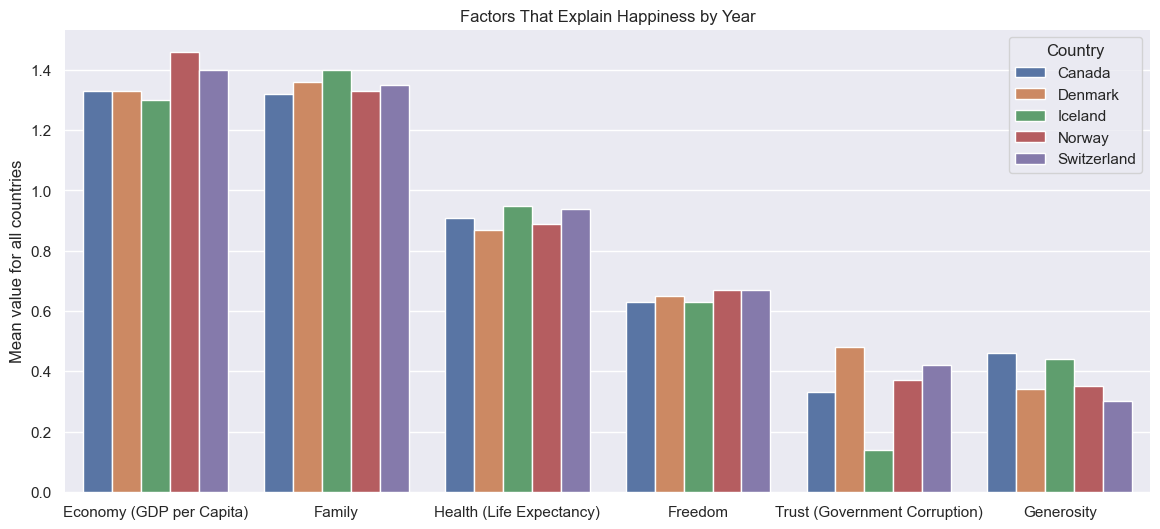

In [94]:
plt.figure(figsize=(14,6))
g = sns.barplot(x=groupedcountry[groupedcountry['Factor'] != 'Happiness Score']['Factor'],
                y=groupedcountry['Avg_value'], hue=groupedcountry['Country'])
g.set_title('Factors That Explain Happiness by Year')
g.set(xlabel=None, ylabel='Mean value for all countries')
sns.despine(left=True, bottom=True, top=True)

In [95]:
# Group data by year and compute mean of factors
groupedcountry2 = bottom_5.groupby(by='Country')[['Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity']].mean().reset_index()

In [96]:
# Reconstruct DataFrame
groupedcountry2 = pd.melt(frame = groupedcountry2, id_vars='Country', 
                  value_vars=['Happiness Score', 'Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity'],
                  var_name='Factor', value_name='Avg_value')

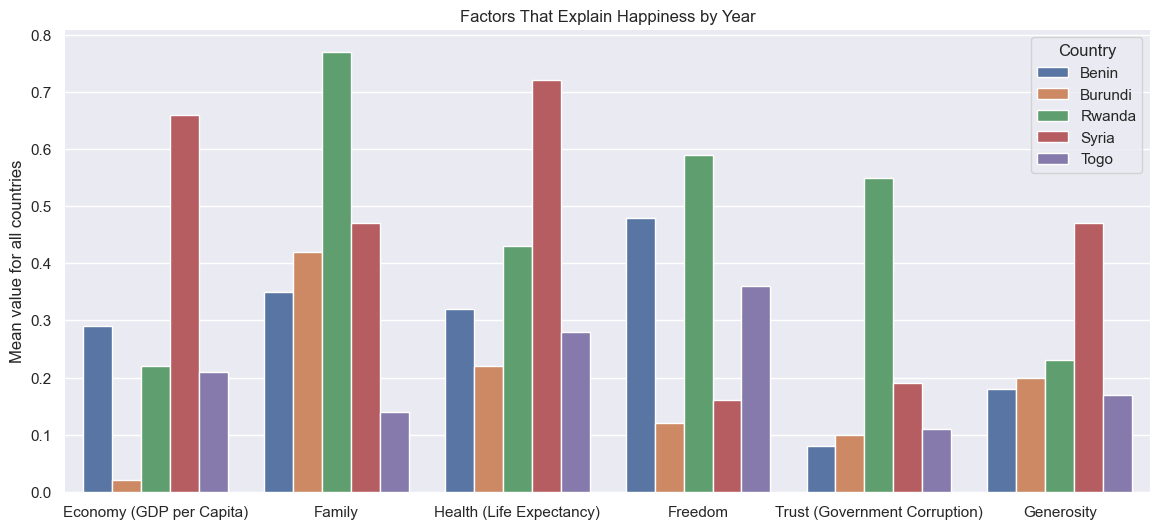

In [97]:
plt.figure(figsize=(14,6))
g = sns.barplot(x=groupedcountry2[groupedcountry2['Factor'] != 'Happiness Score']['Factor'],
                y=groupedcountry2['Avg_value'], hue=groupedcountry2['Country'])
g.set_title('Factors That Explain Happiness by Year')
g.set(xlabel=None, ylabel='Mean value for all countries')
sns.despine(left=True, bottom=True, top=True)

In [98]:
groupedyear1 = df15.groupby(by = 'Year')[['Happiness Score','Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity']].mean().reset_index()

# Now we reconstruct the df by using melt() function
groupedyear1 = pd.melt(frame = groupedyear1, id_vars='Year', value_vars=['Happiness Score','Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity'], var_name='Factor', value_name='Avg_value')



In [99]:
groupedyear2 = df16.groupby(by = 'Year')[['Happiness Score','Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity']].mean().reset_index()

# Now we reconstruct the df by using melt() function
groupedyear2 = pd.melt(frame = groupedyear2, id_vars='Year', value_vars=['Happiness Score','Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity'], var_name='Factor', value_name='Avg_value')

In [100]:
groupedyear3 = df17.groupby(by = 'Year')[['Happiness Score','Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity']].mean().reset_index()

# Now we reconstruct the df by using melt() function
groupedyear3 = pd.melt(frame = groupedyear3, id_vars='Year', value_vars=['Happiness Score','Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity'], var_name='Factor', value_name='Avg_value')

In [101]:
groupedyear4 = df18.groupby(by = 'Year')[['Happiness Score','Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity']].mean().reset_index()

# Now we reconstruct the df by using melt() function
groupedyear4 = pd.melt(frame = groupedyear4, id_vars='Year', value_vars=['Happiness Score','Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity'], var_name='Factor', value_name='Avg_value')

In [102]:
groupedyear5 = df19.groupby(by = 'Year')[['Happiness Score','Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity']].mean().reset_index()

# Now we reconstruct the df by using melt() function
groupedyear5 = pd.melt(frame = groupedyear5, id_vars='Year', value_vars=['Happiness Score','Economy (GDP per Capita)',
       'Family', 'Health (Life Expectancy)', 'Freedom',
       'Trust (Government Corruption)', 'Generosity'], var_name='Factor', value_name='Avg_value')

In [103]:
grupo1=groupedyear1.merge(groupedyear2)
grupo2=groupedyear3.merge(groupedyear4)
grupo3=grupo2.merge(groupedyear5)


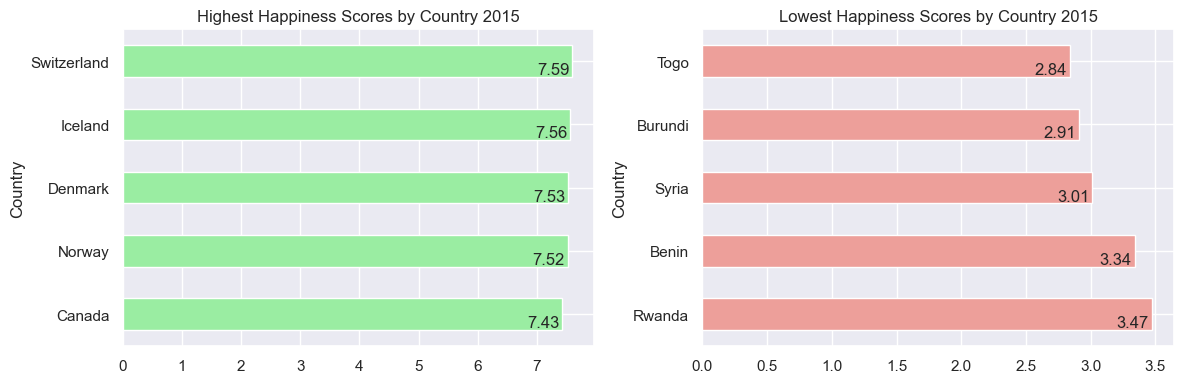

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

happiest_countries_2015 = df15[['Country', 'Happiness Score']].head()
happiest_countries_2015 = happiest_countries_2015.iloc[::-1] # Happiest on Top
happiest_countries_2015 = happiest_countries_2015.set_index(happiest_countries_2015['Country']).drop('Country', axis='columns')
# print(happiest_countries_2015)
happiest_countries_2015 = happiest_countries_2015.plot(kind='barh', legend=False, color='#9AEDA2', ax=ax[0])
for p in happiest_countries_2015.patches:
    happiest_countries_2015.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
                                     xytext=(-2, 2), textcoords='offset points', horizontalalignment='right')
    
  
saddest_countries_2015 = df15[['Country', 'Happiness Score']].tail()
saddest_countries_2015 = saddest_countries_2015.set_index(saddest_countries_2015['Country']).drop('Country', axis='columns')
# print(saddest_countries_2019)
saddest_countries_2015 = saddest_countries_2015.plot(kind='barh', legend=False, color='#ED9F9A', ax=ax[1])
for p in saddest_countries_2015.patches:
    saddest_countries_2015.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
                                    xytext=(-2, 2), textcoords='offset points', horizontalalignment='right')
    

ax[0].set_title('Highest Happiness Scores by Country 2015')
ax[1].set_title('Lowest Happiness Scores by Country 2015')

fig.tight_layout()

In [105]:
Happy = df15.groupby('Country').sum().sort_values(by='Happiness Score',ascending=False).drop('Year', axis=1)[:50]
Least = df15.groupby('Country').sum().sort_values(by='Happiness Score',ascending=False).drop('Year', axis=1)[-50:]

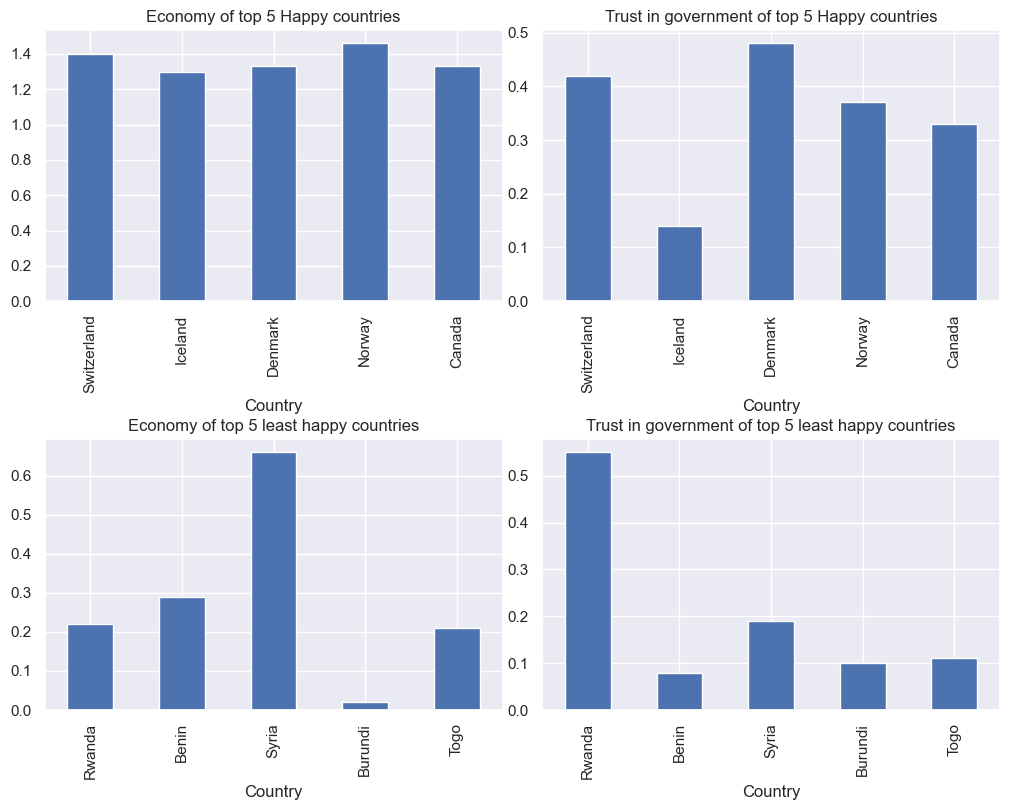

In [107]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title("Economy of top 5 Happy countries")
Happy['Economy (GDP per Capita)'][:5].plot(kind='bar')

plt.subplot(2,2,2)
plt.title("Trust in government of top 5 Happy countries")
Happy['Trust (Government Corruption)'][:5].plot(kind='bar')

plt.subplot(2,2,3)
plt.title("Economy of top 5 least happy countries")
Least['Economy (GDP per Capita)'][-5:].plot(kind='bar')


plt.subplot(2,2,4)
plt.title("Trust in government of top 5 least happy countries")
Least['Trust (Government Corruption)'][-5:].plot(kind='bar')

plt.tight_layout(pad=0.3)

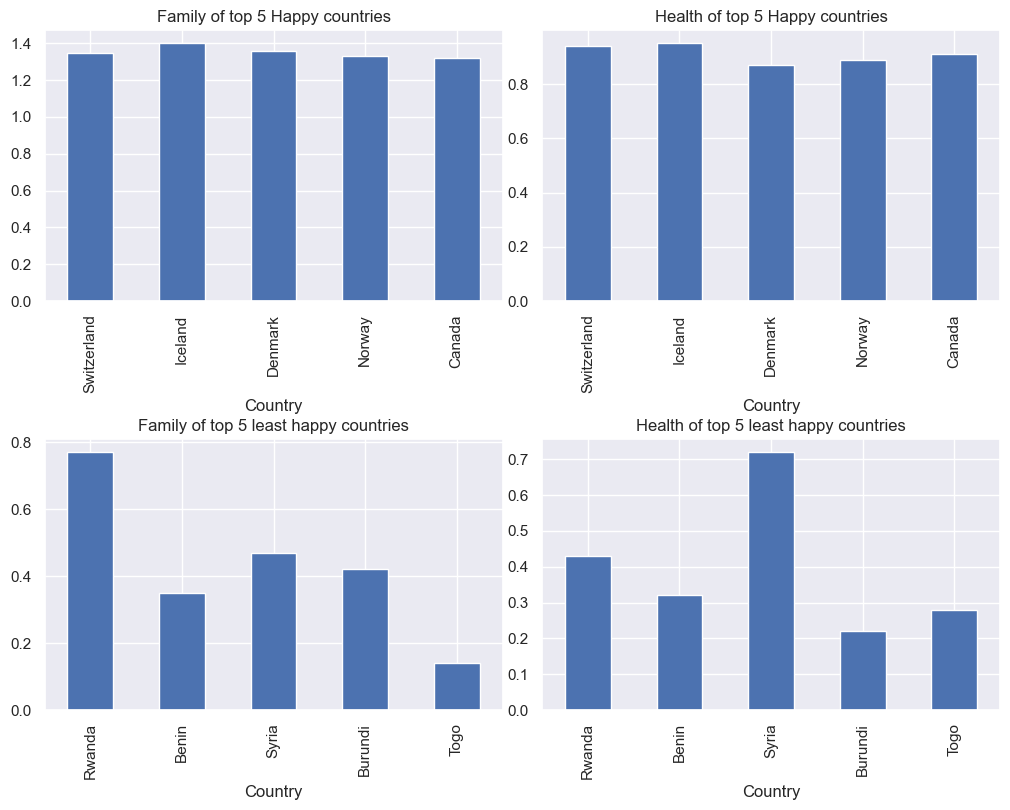

In [108]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.title("Family of top 5 Happy countries")
Happy['Family'][:5].plot(kind='bar')

plt.subplot(2,2,2)
plt.title("Health of top 5 Happy countries")
Happy['Health (Life Expectancy)'][:5].plot(kind='bar')

plt.subplot(2,2,3)
plt.title("Family of top 5 least happy countries")
Least['Family'][-5:].plot(kind='bar')


plt.subplot(2,2,4)
plt.title("Health of top 5 least happy countries")
Least['Health (Life Expectancy)'][-5:].plot(kind='bar')

plt.tight_layout(pad=0.3)

# Año 2016

## 1. Análisis normalidad y correlación

C:\Users\fara1\AppData\Local\Temp\ipykernel_12312\44921697.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot: >

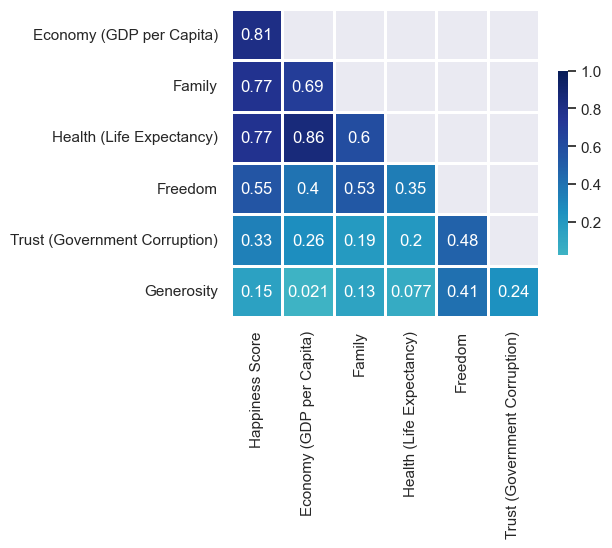

In [109]:
corr = df16.corr(method = 'spearman').sort_values(by = 'Happiness Score', axis = 0, ascending = False).sort_values(by = 'Happiness Score', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool)) # tri u o tri l para cambiar la forma
 # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5,4))
 # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 # Draw the heatmap with the mask and correct aspect ratio
sns.set()
sns.heatmap(corr.iloc[1:7,0:6], mask=mask[1:7,0:6], cmap="YlGnBu", vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .6}, annot = True)

<AxesSubplot: ylabel='Region'>

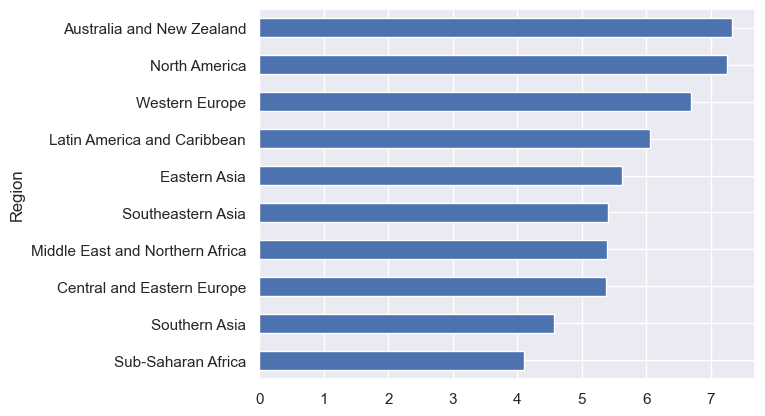

In [110]:
df16.groupby(by='Region').mean()['Happiness Score'].sort_values().plot(kind='barh')

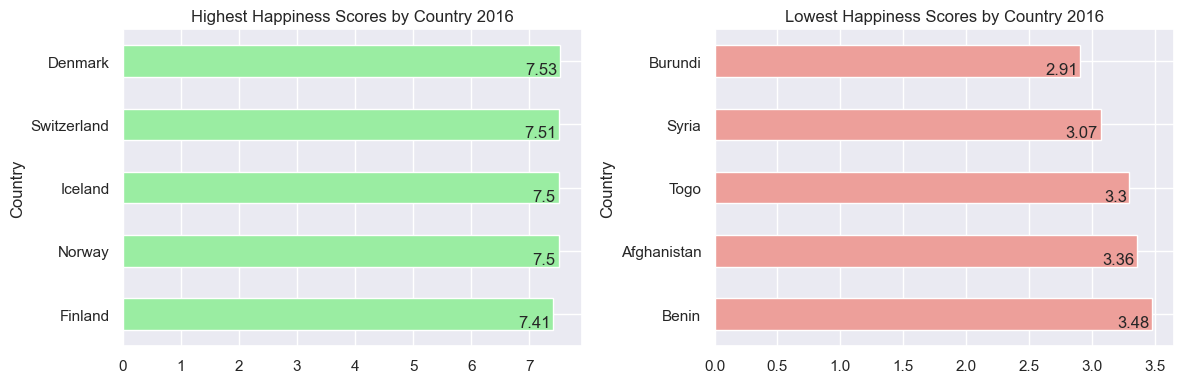

In [111]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

happiest_countries_2016 = df16[['Country', 'Happiness Score']].head()
happiest_countries_2016 = happiest_countries_2016.iloc[::-1] # Happiest on Top
happiest_countries_2016 = happiest_countries_2016.set_index(happiest_countries_2016['Country']).drop('Country', axis='columns')
# print(happiest_countries_2019)
happiest_countries_2016 = happiest_countries_2016.plot(kind='barh', legend=False, color='#9AEDA2', ax=ax[0])
for p in happiest_countries_2016.patches:
    happiest_countries_2016.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
                                     xytext=(-2, 2), textcoords='offset points', horizontalalignment='right')
    
  
saddest_countries_2016 = df16[['Country', 'Happiness Score']].tail()
saddest_countries_2016 = saddest_countries_2016.set_index(saddest_countries_2016['Country']).drop('Country', axis='columns')
# print(saddest_countries_2019)
saddest_countries_2016 = saddest_countries_2016.plot(kind='barh', legend=False, color='#ED9F9A', ax=ax[1])
for p in saddest_countries_2016.patches:
    saddest_countries_2016.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
                                    xytext=(-2, 2), textcoords='offset points', horizontalalignment='right')
    

ax[0].set_title('Highest Happiness Scores by Country 2016')
ax[1].set_title('Lowest Happiness Scores by Country 2016')

fig.tight_layout()

# Año 2017


C:\Users\fara1\AppData\Local\Temp\ipykernel_12312\1177780210.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot: >

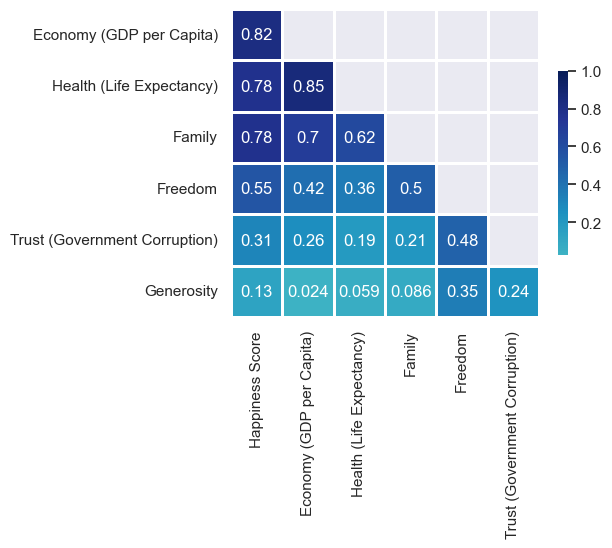

In [112]:
corr = df17.corr(method = 'spearman').sort_values(by = 'Happiness Score', axis = 0, ascending = False).sort_values(by = 'Happiness Score', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool)) # tri u o tri l para cambiar la forma
 # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5,4))
 # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 # Draw the heatmap with the mask and correct aspect ratio
sns.set()
sns.heatmap(corr.iloc[1:7,0:6], mask=mask[1:7,0:6], cmap="YlGnBu", vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .6}, annot = True)

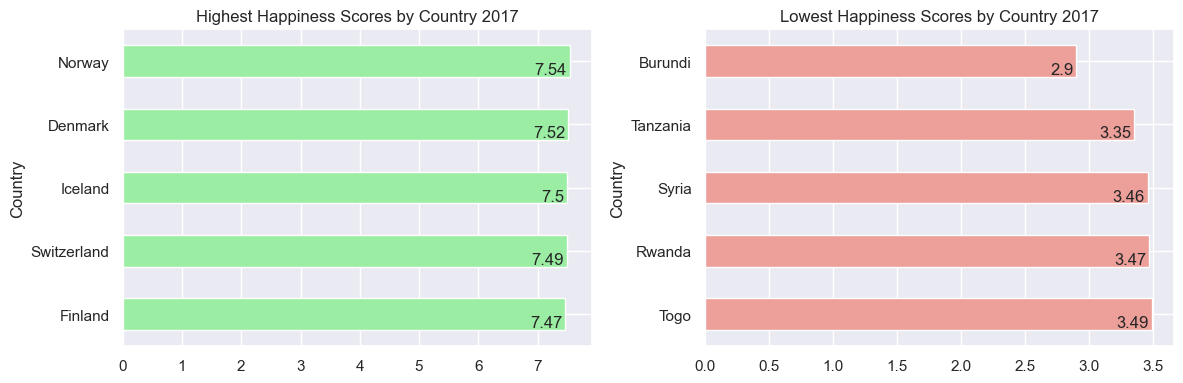

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

happiest_countries_2017 = df17[['Country', 'Happiness Score']].head()
happiest_countries_2017 = happiest_countries_2017.iloc[::-1] # Happiest on Top
happiest_countries_2017 = happiest_countries_2017.set_index(happiest_countries_2017['Country']).drop('Country', axis='columns')
# print(happiest_countries_2019)
happiest_countries_2017 = happiest_countries_2017.plot(kind='barh', legend=False, color='#9AEDA2', ax=ax[0])
for p in happiest_countries_2017.patches:
    happiest_countries_2017.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
                                     xytext=(-2, 2), textcoords='offset points', horizontalalignment='right')
    
  
saddest_countries_2017 = df17[['Country', 'Happiness Score']].tail()
saddest_countries_2017 = saddest_countries_2017.set_index(saddest_countries_2017['Country']).drop('Country', axis='columns')
# print(saddest_countries_2019)
saddest_countries_2017 = saddest_countries_2017.plot(kind='barh', legend=False, color='#ED9F9A', ax=ax[1])
for p in saddest_countries_2017.patches:
    saddest_countries_2017.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
                                    xytext=(-2, 2), textcoords='offset points', horizontalalignment='right')
    

ax[0].set_title('Highest Happiness Scores by Country 2017')
ax[1].set_title('Lowest Happiness Scores by Country 2017')

fig.tight_layout()

# Año 2018

C:\Users\fara1\AppData\Local\Temp\ipykernel_12312\4249601345.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot: >

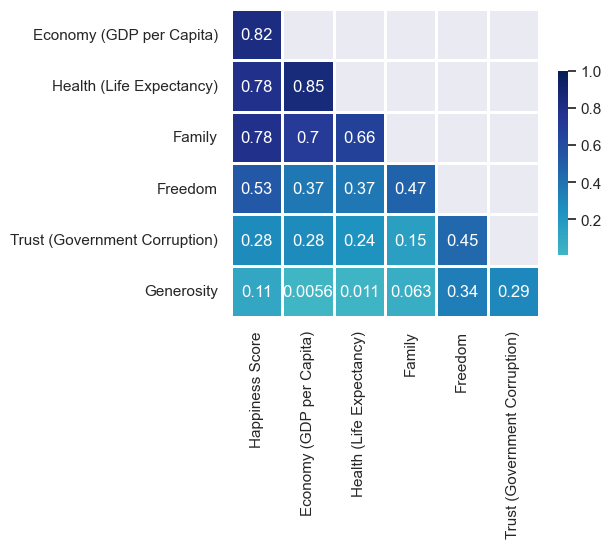

In [114]:
corr = df18.corr(method = 'spearman').sort_values(by = 'Happiness Score', axis = 0, ascending = False).sort_values(by = 'Happiness Score', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool)) # tri u o tri l para cambiar la forma
 # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5,4))
 # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 # Draw the heatmap with the mask and correct aspect ratio
sns.set()
sns.heatmap(corr.iloc[1:7,0:6], mask=mask[1:7,0:6], cmap="YlGnBu", vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .6}, annot = True)

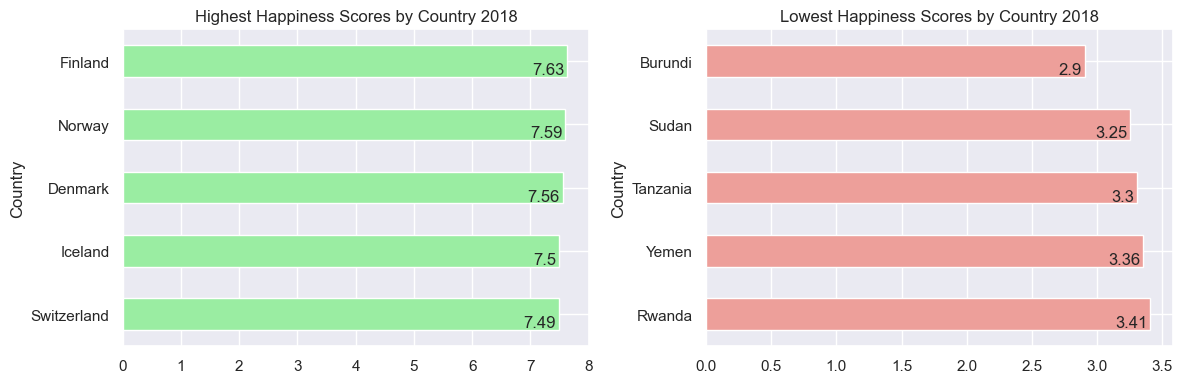

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

happiest_countries_2018 = df18[['Country', 'Happiness Score']].head()
happiest_countries_2018 = happiest_countries_2018.iloc[::-1] # Happiest on Top
happiest_countries_2018 = happiest_countries_2018.set_index(happiest_countries_2018['Country']).drop('Country', axis='columns')
# print(happiest_countries_2019)
happiest_countries_2018 = happiest_countries_2018.plot(kind='barh', legend=False, color='#9AEDA2', ax=ax[0])
for p in happiest_countries_2018.patches:
    happiest_countries_2018.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
                                     xytext=(-2, 2), textcoords='offset points', horizontalalignment='right')
    
  
saddest_countries_2018 = df18[['Country', 'Happiness Score']].tail()
saddest_countries_2018 = saddest_countries_2018.set_index(saddest_countries_2018['Country']).drop('Country', axis='columns')
# print(saddest_countries_2019)
saddest_countries_2018 = saddest_countries_2018.plot(kind='barh', legend=False, color='#ED9F9A', ax=ax[1])
for p in saddest_countries_2018.patches:
    saddest_countries_2018.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
                                    xytext=(-2, 2), textcoords='offset points', horizontalalignment='right')
    

ax[0].set_title('Highest Happiness Scores by Country 2018')
ax[1].set_title('Lowest Happiness Scores by Country 2018')

fig.tight_layout()

# Año 2019

C:\Users\fara1\AppData\Local\Temp\ipykernel_12312\945812986.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot: >

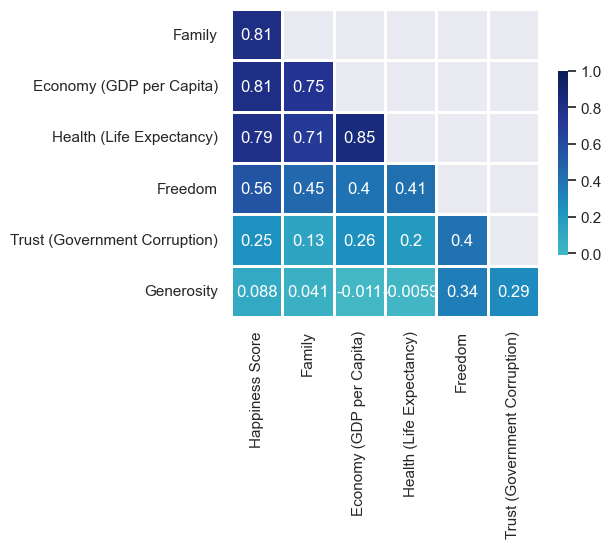

In [116]:
corr = df19.corr(method = 'spearman').sort_values(by = 'Happiness Score', axis = 0, ascending = False).sort_values(by = 'Happiness Score', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool)) # tri u o tri l para cambiar la forma
 # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5,4))
 # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 # Draw the heatmap with the mask and correct aspect ratio
sns.set()
sns.heatmap(corr.iloc[1:7,0:6], mask=mask[1:7,0:6], cmap="YlGnBu", vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .6}, annot = True)

In [117]:
#Agradecimientos:Kaggle
#"Coding is fun youtube"
#DRBEANESP21 kaggle

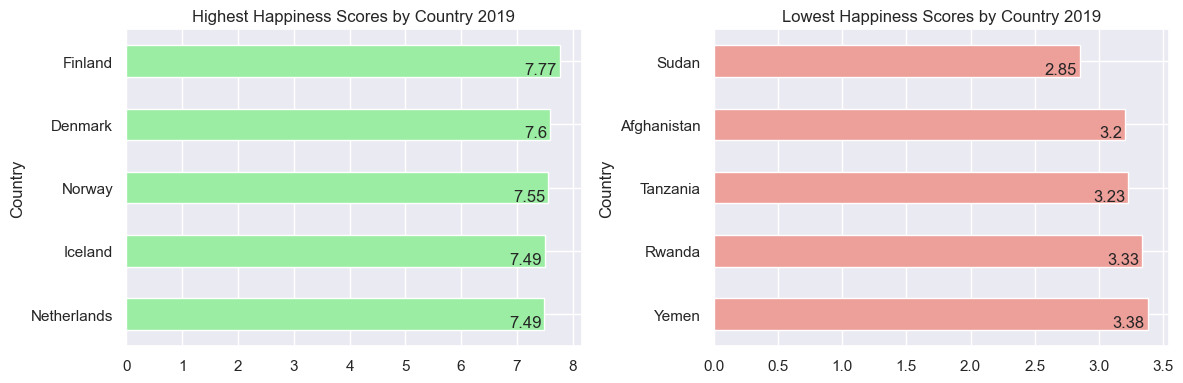

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

happiest_countries_2019 = df19[['Country', 'Happiness Score']].head()
happiest_countries_2019 = happiest_countries_2019.iloc[::-1] # Happiest on Top
happiest_countries_2019 = happiest_countries_2019.set_index(happiest_countries_2019['Country']).drop('Country', axis='columns')
# print(happiest_countries_2019)
happiest_countries_2019 = happiest_countries_2019.plot(kind='barh', legend=False, color='#9AEDA2', ax=ax[0])
for p in happiest_countries_2019.patches:
    happiest_countries_2019.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
                                     xytext=(-2, 2), textcoords='offset points', horizontalalignment='right')
    
  
saddest_countries_2019 = df19[['Country', 'Happiness Score']].tail()
saddest_countries_2019 = saddest_countries_2019.set_index(saddest_countries_2019['Country']).drop('Country', axis='columns')
# print(saddest_countries_2019)
saddest_countries_2019 = saddest_countries_2019.plot(kind='barh', legend=False, color='#ED9F9A', ax=ax[1])
for p in saddest_countries_2019.patches:
    saddest_countries_2019.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
                                    xytext=(-2, 2), textcoords='offset points', horizontalalignment='right')
    

ax[0].set_title('Highest Happiness Scores by Country 2019')
ax[1].set_title('Lowest Happiness Scores by Country 2019')

fig.tight_layout()

## Comparativos

In [119]:
#DF con los 10 paises mas felices
top_5_2015 = df15.iloc[:5,:]
top_5_2016 = df16.iloc[:5,:]
top_5_2017 = df17.iloc[:5,:]
top_5_2018 = df18.iloc[:5,:]
top_5_2019 = df19.iloc[:5,:]

In [120]:
# creating trace1
uno =go.Scatter(
                    y = top_5_2015['Country'],
                    x = top_5_2015['Happiness Score'],
                    mode = "markers",
                    name = "2015",
                    marker = dict(size= 10,color = 'red'),
                    text= top_5_2015.Country)
# creating trace2
dos =go.Scatter(
                    y = top_5_2015['Country'],
                    x = top_5_2016['Happiness Score'],
                    mode = "markers",
                    name = "2016",
                    marker = dict(size= 10,color = 'green'),
                    text= top_5_2015.Country)
# creating trace3
tres =go.Scatter(
                    y = top_5_2015['Country'],
                    x = top_5_2017['Happiness Score'],
                    mode = "markers",
                    name = "2017",
                    marker = dict(size= 10,color = 'blue'),
                    text= top_5_2015.Country)

# creating trace4
cuatro =go.Scatter(
                    y = top_5_2015['Country'],
                    x = top_5_2018['Happiness Score'],
                    mode = "markers",
                    name = "2018",
                    marker = dict(size= 10,color = 'black'),
                    text= top_5_2015.Country)

# creating trace5
cinco =go.Scatter(
                    y = top_5_2015['Country'],
                    x = top_5_2019['Happiness Score'],
                    mode = "markers",
                    name = "2019",
                    marker = dict(size= 10,color = 'pink'),
                    text= top_5_2015.Country)


data = [uno, dos, tres, cuatro, cinco]
layout = dict(title = "Evolución 2015-2019 top 5 más felices",
              xaxis= dict(title= 'Country',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Happiness',ticklen= 5,zeroline= False),
              hovermode="x unified"
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [121]:
#DF con los 10 paises mas felices
notop_5_2015 = df15.iloc[143:,:]
notop_5_2016 = df16.iloc[143:,:]
notop_5_2017 = df17.iloc[143:,:]
notop_5_2018 = df18.iloc[143:,:]
notop_5_2019 = df19.iloc[143:,:]

In [122]:
uno =go.Scatter(
                    y = notop_5_2015['Country'],
                    x = notop_5_2015['Happiness Score'],
                    mode = "markers",
                    name = "2015",
                    marker = dict(size= 10,color = 'red'),
                    text= notop_5_2015.Country)
# creating trace2
dos =go.Scatter(
                    y = notop_5_2015['Country'],
                    x = notop_5_2016['Happiness Score'],
                    mode = "markers",
                    name = "2016",
                    marker = dict(size= 10,color = 'green'),
                    text= notop_5_2015.Country)
# creating trace3
tres =go.Scatter(
                    y = notop_5_2015['Country'],
                    x = notop_5_2017['Happiness Score'],
                    mode = "markers",
                    name = "2017",
                    marker = dict(size= 10,color = 'blue'),
                    text= notop_5_2015.Country)

# creating trace4
cuatro =go.Scatter(
                    y = notop_5_2015['Country'],
                    x = notop_5_2018['Happiness Score'],
                    mode = "markers",
                    name = "2018",
                    marker = dict(size= 10,color = 'black'),
                    text= notop_5_2015.Country)

# creating trace5
cinco =go.Scatter(
                    y = notop_5_2015['Country'],
                    x = notop_5_2019['Happiness Score'],
                    mode = "markers",
                    name = "2019",
                    marker = dict(size= 10,color = 'pink'),
                    text= notop_5_2015.Country)


data = [uno, dos, tres, cuatro, cinco]
layout = dict(title = "Evolución 2015-2019 top 5 menos felices",
              xaxis= dict(title= 'Country',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Happiness',ticklen= 5,zeroline= False),
              hovermode="x unified"
             )
fig = dict(data = data, layout = layout)
iplot(fig)

Regiones

Top 10 interactivo

In [123]:
#creo df nuevo solo con Happiness Score, año y country 

In [124]:
HSxyear=pd.read_csv("dfxyear.csv",sep="[;]",engine="python")

In [125]:
HSxyear

,Country,Switzerland,Iceland,Denmark,Norway,Canada,Finland,Netherlands,Sweden,New Zealand,...,Chad,Guinea,Ivory Coast,Burkina Faso,Afghanistan,Rwanda,Benin,Syria,Burundi,Togo
0,2015,"7,59","7,56","7,53","7,52","7,43","7,41","7,38","7,36","7,29",...,"3,67","3,66","3,66","3,59","3,58","3,47","3,34","3,01","2,91","2,84"
1,2016,"7,51","7,5","7,53","7,5","7,4","7,41","7,34","7,29","7,33",...,"3,76","3,61","3,92","3,74","3,36","3,52","3,48","3,07","2,91","3,3"
2,2017,"7,49","7,5","7,52","7,54","7,32","7,47","7,38","7,28","7,31",...,"3,94","3,51","4,18","4,03","3,79","3,47","3,66","3,46","2,9","3,49"
3,2018,"7,49","7,50","7,56","7,59","7,33","7,63","7,44","7,31","7,32",...,"4,30","3,96","4,67","4,42","3,63","3,41","4,14","3,46","2,91","4,00"
4,2019,"7,48","7,49","7,60","7,55","7,28","7,77","7,49","7,34","7,31",...,"4,35","4,53","4,94","4,59","3,20","3,33","4,88","3,46","3,78","4,09"


In [126]:
HSxyear

,Country,Switzerland,Iceland,Denmark,Norway,Canada,Finland,Netherlands,Sweden,New Zealand,...,Chad,Guinea,Ivory Coast,Burkina Faso,Afghanistan,Rwanda,Benin,Syria,Burundi,Togo
0,2015,"7,59","7,56","7,53","7,52","7,43","7,41","7,38","7,36","7,29",...,"3,67","3,66","3,66","3,59","3,58","3,47","3,34","3,01","2,91","2,84"
1,2016,"7,51","7,5","7,53","7,5","7,4","7,41","7,34","7,29","7,33",...,"3,76","3,61","3,92","3,74","3,36","3,52","3,48","3,07","2,91","3,3"
2,2017,"7,49","7,5","7,52","7,54","7,32","7,47","7,38","7,28","7,31",...,"3,94","3,51","4,18","4,03","3,79","3,47","3,66","3,46","2,9","3,49"
3,2018,"7,49","7,50","7,56","7,59","7,33","7,63","7,44","7,31","7,32",...,"4,30","3,96","4,67","4,42","3,63","3,41","4,14","3,46","2,91","4,00"
4,2019,"7,48","7,49","7,60","7,55","7,28","7,77","7,49","7,34","7,31",...,"4,35","4,53","4,94","4,59","3,20","3,33","4,88","3,46","3,78","4,09"


In [127]:
# create a facet plot 
fig = px.scatter(df15, x='Region', y='Happiness Score', color='Happiness Score', size='Happiness Score', size_max=40, 
                hover_name='Country')
fig.show() 

In [128]:
# let's add animation 
fig = px.scatter(df15, x="Region", y="Happiness Score", color="Happiness Score", size="Happiness Score", size_max=30, 
                hover_name="Country", animation_frame='Year',
                animation_group='Country')
fig.show()

In [129]:
# fig, ax = plt.subplots(5,2, figsize=(12, 20))

# happiest_countries_2015 = df15[['Country', 'Happiness Score']].head()
# happiest_countries_2015 = happiest_countries_2015.iloc[::-1] # Happiest on Top
# happiest_countries_2015 = happiest_countries_2015.set_index(happiest_countries_2015['Country']).drop('Country', axis='columns')
# # print(happiest_countries_2015)
# happiest_countries_2015 = happiest_countries_2015.plot(kind='barh', legend=False, color='#98FB98', ax=ax[0,0]);
# for p in happiest_countries_2015.patches:
#     happiest_countries_2015.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
#                                      xytext=(-2, 2), textcoords='offset points', horizontalalignment='right');

# happiest_countries_2016 = df16[['Country', 'Happiness Score']].head()
# happiest_countries_2016 = happiest_countries_2016.iloc[::-1] # Happiest on Top
# happiest_countries_2016 = happiest_countries_2016.set_index(happiest_countries_2016['Country']).drop('Country', axis='columns')
# # print(happiest_countries_2016)
# happiest_countries_2016 = happiest_countries_2016.plot(kind='barh', legend=False, color='#D2B48C', ax=ax[1,0]);
# for p in happiest_countries_2016.patches:
#     happiest_countries_2016.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
#                                      xytext=(-2, 2), textcoords='offset points', horizontalalignment='right');

# happiest_countries_2017 = df17[['Country', 'Happiness Score']].head()
# happiest_countries_2017 = happiest_countries_2017.iloc[::-1] # Happiest on Top
# happiest_countries_2017 = happiest_countries_2017.set_index(happiest_countries_2017['Country']).drop('Country', axis='columns')
# # print(happiest_countries_2017)
# happiest_countries_2017 = happiest_countries_2017.plot(kind='barh', legend=False, color='#EEAEEE', ax=ax[2,0]);
# for p in happiest_countries_2017.patches:
#     happiest_countries_2017.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
#                                      xytext=(-2, 2), textcoords='offset points', horizontalalignment='right');
    
# happiest_countries_2018 = df18[['Country', 'Happiness Score']].head()
# happiest_countries_2018 = happiest_countries_2018.iloc[::-1] # Happiest on Top
# happiest_countries_2018 = happiest_countries_2018.set_index(happiest_countries_2018['Country']).drop('Country', axis='columns')
# # print(happiest_countries_2018)
# happiest_countries_2018 = happiest_countries_2018.plot(kind='barh', legend=False, color='#FFDE66', ax=ax[3,0]);
# for p in happiest_countries_2018.patches:
#     happiest_countries_2018.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
#                                      xytext=(-2, 2), textcoords='offset points', horizontalalignment='right');

# happiest_countries_2019 = df19[['Country', 'Happiness Score']].head()
# happiest_countries_2019 = happiest_countries_2019.iloc[::-1] # Happiest on Top
# happiest_countries_2019 = happiest_countries_2019.set_index(happiest_countries_2019['Country']).drop('Country', axis='columns')
# # print(happiest_countries_2019)
# happiest_countries_2019 = happiest_countries_2019.plot(kind='barh', legend=False, color='#9BF6FF', ax=ax[4,0]);
# for p in happiest_countries_2019.patches:
#     happiest_countries_2019.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
#                                      xytext=(-2, 2), textcoords='offset points', horizontalalignment='right');
    


# saddest_countries_2015 = df15[['Country', 'Happiness Score']].tail()
# saddest_countries_2015 = saddest_countries_2015.set_index(saddest_countries_2015['Country']).drop('Country', axis='columns')
# # print(saddest_countries_2015)
# saddest_countries_2015 = saddest_countries_2015.plot(kind='barh', legend=False, color='#98FB98', ax=ax[0,1]);
# for p in saddest_countries_2015.patches:
#     saddest_countries_2015.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
#                                     xytext=(-2, 2), textcoords='offset points', horizontalalignment='right');

# saddest_countries_2016 = df16[['Country', 'Happiness Score']].tail()
# saddest_countries_2016 = saddest_countries_2016.set_index(saddest_countries_2016['Country']).drop('Country', axis='columns')
# # print(saddest_countries_2016)
# saddest_countries_2016 = saddest_countries_2016.plot(kind='barh', legend=False, color='#D2B48C', ax=ax[1,1]);
# for p in saddest_countries_2016.patches:
#     saddest_countries_2016.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
#                                     xytext=(-2, 2), textcoords='offset points', horizontalalignment='right');

# saddest_countries_2017 = df17[['Country', 'Happiness Score']].tail()
# saddest_countries_2017 = saddest_countries_2017.set_index(saddest_countries_2017['Country']).drop('Country', axis='columns')
# # print(saddest_countries_2017)
# saddest_countries_2017 = saddest_countries_2017.plot(kind='barh', legend=False, color='#EEAEEE', ax=ax[2,1]);
# for p in saddest_countries_2017.patches:
#     saddest_countries_2017.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
#                                     xytext=(-2, 2), textcoords='offset points', horizontalalignment='right');
    
# saddest_countries_2018 = df18[['Country', 'Happiness Score']].tail()
# saddest_countries_2018 = saddest_countries_2018.set_index(saddest_countries_2018['Country']).drop('Country', axis='columns')
# # print(saddest_countries_2018)
# saddest_countries_2018 = saddest_countries_2018.plot(kind='barh', legend=False, color='#FFDE66', ax=ax[3,1]);
# for p in saddest_countries_2018.patches:
#     saddest_countries_2018.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
#                                     xytext=(-2, 2), textcoords='offset points', horizontalalignment='right');
    
# saddest_countries_2019 = df19[['Country', 'Happiness Score']].tail()
# saddest_countries_2019 = saddest_countries_2019.set_index(saddest_countries_2019['Country']).drop('Country', axis='columns')
# # print(saddest_countries_2019)
# saddest_countries_2019 = saddest_countries_2019.plot(kind='barh', legend=False, color='#9BF6FF', ax=ax[4,1]);
# for p in saddest_countries_2019.patches:
#     saddest_countries_2019.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
#                                     xytext=(-2, 2), textcoords='offset points', horizontalalignment='right');
    

# ax[0,0].set_title('Highest Happiness Scores by Country 2015')
# ax[1,0].set_title('Highest Happiness Scores by Country 2016')
# ax[2,0].set_title('Highest Happiness Scores by Country 2017')
# ax[3,0].set_title('Highest Happiness Scores by Country 2018')
# ax[4,0].set_title('Highest Happiness Scores by Country 2019')

# ax[0,1].set_title('Lowest Happiness Scores by Country 2015')
# ax[1,1].set_title('Lowest Happiness Scores by Country 2016')
# ax[2,1].set_title('Lowest Happiness Scores by Country 2017')
# ax[3,1].set_title('Lowest Happiness Scores by Country 2018')
# ax[4,1].set_title('Lowest Happiness Scores by Country 2019')

# fig.tight_layout()

In [130]:
#fuente BATTAL UÇAR kaggle

In [131]:
df=pd.DataFrame(df19.sort_values(by='Happiness Score',ascending=False)['Country'].head(10))

In [132]:
df

,Country
0,Finland
1,Denmark
2,Norway
3,Iceland
4,Netherlands
5,Switzerland
6,Sweden
7,New Zealand
8,Canada
9,Austria


In [133]:
# Getting Happiness scores across years for the 10 Happiest countries in 2020

score_2015=[]
score_2016=[]
score_2017=[]
score_2018=[]
score_2019=[]

In [134]:
for country in df['Country']:
    score_2015.append(list(df15[df15['Country']==country]['Happiness Score']))
    score_2016.append(list(df16[df16['Country']==country]['Happiness Score']))
    score_2017.append(list(df17[df17['Country']==country]['Happiness Score']))
    score_2018.append(list(df18[df18['Country']==country]['Happiness Score']))
    score_2019.append(list(df19[df19['Country']==country]['Happiness Score']))

In [135]:
df['2015']=pd.DataFrame(score_2015)
df['2016']=pd.DataFrame(score_2016)
df['2017']=pd.DataFrame(score_2017)
df['2018']=pd.DataFrame(score_2018)
df['2019']=pd.DataFrame(score_2019)

df=df.transpose()
df.columns=['Finland','Denmark','Switzerland','Iceland','Norway','Netherlands','Sweden','New Zealand','Austria','Luxembourg']
df.drop(['Country'],inplace=True)
df.reset_index(drop=True, inplace=True)
df['Year']=['2015','2016','2017','2018','2019']

In [136]:
df

,Finland,Denmark,Switzerland,Iceland,Norway,Netherlands,Sweden,New Zealand,Austria,Luxembourg,Year
0,7.41,7.53,7.52,7.56,7.38,7.59,7.36,7.29,7.43,7.2,2015
1,7.41,7.53,7.5,7.5,7.34,7.51,7.29,7.33,7.4,7.12,2016
2,7.47,7.52,7.54,7.5,7.38,7.49,7.28,7.31,7.32,7.01,2017
3,7.632,7.555,7.594,7.495,7.441,7.487,7.314,7.324,7.328,7.139,2018
4,7.769,7.6,7.554,7.494,7.488,7.48,7.343,7.307,7.278,7.246,2019


2022-11-22 20:02:16.531 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-11-22 20:02:16.543 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-11-22 20:02:16.548 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-11-22 20:02:16.548 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-11-22 20:02:16.548 INFO

Text(0, 0.5, 'Happiness Score')

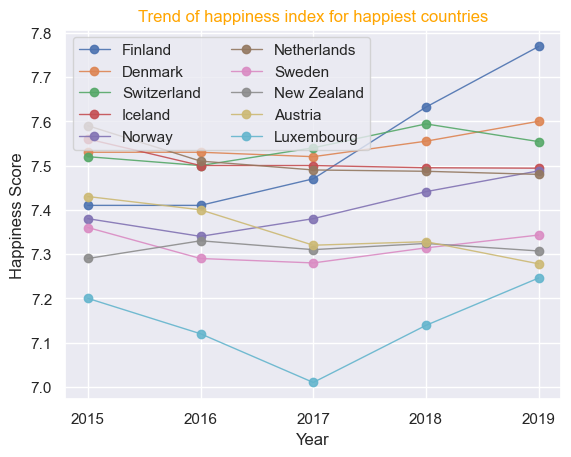

In [137]:
# multiple line plot
num=0
for column in df.drop('Year', axis=1):
    
    num+=1
    plt.plot(df['Year'], df[column], linewidth=1, alpha=0.9, label=column,marker='o')


# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Trend of happiness index for happiest countries", loc='center', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Year")
plt.ylabel("Happiness Score")

In [138]:
# grafico junto mas felices y menos felices
# df2021_happiest_unhappiest = df2021[(df2021.loc[:, "Ladder score"] > 7.4) | (df2021.loc[:, "Ladder score"] < 3.5)]
# sns.barplot(x = "Ladder score", y = "Country name", data=df2021_happiest_unhappiest, palette = "coolwarm")
# plt.title("Happiest and Unhappiest Countries in 2021")
# plt.show()

In [143]:
dfxyear=pd.read_csv("dfxyear.csv",sep="[;]",engine="python",index_col=False)

In [144]:
dfxyear

,Country,Switzerland,Iceland,Denmark,Norway,Canada,Finland,Netherlands,Sweden,New Zealand,...,Chad,Guinea,Ivory Coast,Burkina Faso,Afghanistan,Rwanda,Benin,Syria,Burundi,Togo
0,2015,"7,59","7,56","7,53","7,52","7,43","7,41","7,38","7,36","7,29",...,"3,67","3,66","3,66","3,59","3,58","3,47","3,34","3,01","2,91","2,84"
1,2016,"7,51","7,5","7,53","7,5","7,4","7,41","7,34","7,29","7,33",...,"3,76","3,61","3,92","3,74","3,36","3,52","3,48","3,07","2,91","3,3"
2,2017,"7,49","7,5","7,52","7,54","7,32","7,47","7,38","7,28","7,31",...,"3,94","3,51","4,18","4,03","3,79","3,47","3,66","3,46","2,9","3,49"
3,2018,"7,49","7,50","7,56","7,59","7,33","7,63","7,44","7,31","7,32",...,"4,30","3,96","4,67","4,42","3,63","3,41","4,14","3,46","2,91","4,00"
4,2019,"7,48","7,49","7,60","7,55","7,28","7,77","7,49","7,34","7,31",...,"4,35","4,53","4,94","4,59","3,20","3,33","4,88","3,46","3,78","4,09"


In [145]:
dfxyear=dfxyear.transpose()

In [151]:
dfxyear.rename(columns={"0":"2015","1":"2016","2":"2017","3":"2018","4":"2019"}, inplace=True)

In [153]:
dfxyear.to_csv("dfxyear.csv")

In [156]:
dfanual=pd.read_csv("dfxyear.csv")

In [157]:
dfanual

,Country,2015,2016,2017,2018,2019
0,Switzerland,"7,59","7,51","7,49","7,49","7,48"
1,Iceland,"7,56","7,5","7,5","7,50","7,49"
2,Denmark,"7,53","7,53","7,52","7,56","7,60"
3,Norway,"7,52","7,5","7,54","7,59","7,55"
4,Canada,"7,43","7,4","7,32","7,33","7,28"
...,...,...,...,...,...,...
143,Rwanda,"3,47","3,52","3,47","3,41","3,33"
144,Benin,"3,34","3,48","3,66","4,14","4,88"
145,Syria,"3,01","3,07","3,46","3,46","3,46"
146,Burundi,"2,91","2,91","2,9","2,91","3,78"


In [169]:
p15 = go.Scatter(
                    x = top_5_2015["Year"],
                    y = top_5_2015["Happiness Score"],
                    mode = "lines+markers",
                    name = "2015",
                    marker = dict(color = 'green'),
                    text= top_5_2015["Region"])
p16 = go.Scatter(
                    x = top_5_2016["Year"],
                    y = top_5_2016["Happiness Score"],
                    mode = "lines",
                    name = "2016",
                    marker = dict(color = 'red'),
                    text= top_5_2016["Region"])

p17 = go.Scatter(
                    x = top_5_2017["Year"],
                    y = top_5_2017["Happiness Score"],
                    mode = "lines",
                    name = "2017",
                    marker = dict(color = 'violet'),
                    text= top_5_2017["Region"])

p18 = go.Scatter(
                    x = top_5_2018["Year"],
                    y = top_5_2018["Happiness Score"],
                    mode = "lines",
                    name = "2018",
                    marker = dict(color = 'blue'),
                    text= top_5_2018["Region"])

p19 = go.Scatter(
                    x = top_5_2019["Year"],
                    y = top_5_2019["Happiness Score"],
                    mode = "lines",
                    name = "2019",
                    marker = dict(color = 'black'),
                    text= top_5_2019["Region"])


data = [p15, p16, p17, p18, p19]
properties = dict(title = 'Happiness Score vs GDP per Capita',
              xaxis= dict(title= 'GDP per Capita',ticklen= 5,zeroline= False),
             yaxis= dict(title= 'Happiness Score',ticklen= 5,zeroline= False),
             )
fig = dict(data = data, layout = properties)
iplot(fig)